# 분석 개요

## 분석 배경
- 공정(설비) 정의 및 특징  
: 자동차 시스템이며, 자동차 하위 시스템인 엔진의 (정상 / 비정상) 상태와 연관이 있을 수 있는 주변의 500개 센서들로 여러 요소(i.e. 소음, 압력, 진동, 온도 등)들을 측정한다.

## 분석 목적
- 미국 포드(Ford)사에서 제공한 오픈데이터셋을 사용하여 개발한 AI모델로 시스템/설비 예지 보전을 위해, 자동차 시스템 시계열 데이터셋에 대해 분류 알고리즘을 적용하여 불량 제품을 분류하고자 한다.
- 제조업에서 분석 수요가 가장 높은 시계열 데이터를 사용하여 계측 Sensor 값의 주기적인 특성 및 계측 Sensor 간의 관계학습을 통한 분류 및 예측문제를 해결한다.

# 라이브러리 및 데이터 불러오기

## 필요 라이브러리 불러오기

In [60]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

### 직접 다운로드하여 폴더에 저장된 데이터 불러오기

In [72]:
data_PATH = "/Users/yeondyu/Desktop/Projects/datasets/FordA_DATA/"    # Mac
# data_PATH = "./datasets/project_1/"    # Windows
train_fn = 'FordA_TRAIN.arff'
test_fn = 'FordA_TEST.arff'

#ariff 확장자를 Load하기 위한 함수
def read_ariff(path):
    raw_data, meta = loadarff(path)
    cols = [x for x in meta]
    data2d = np.zeros([raw_data.shape[0], len(cols)])
    
    for i, col in zip(range(len(cols)), cols):
        data2d[:, i] = raw_data[col]
    return data2d

train = read_ariff(data_PATH + train_fn)
test = read_ariff(data_PATH + test_fn)

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [73]:
## 데이터 형태 확인
print('train_set shape:', train.shape)
print('test_set shape:', test.shape)
train.head()

train_set shape: (3601, 501)
test_set shape: (1320, 501)


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0


In [74]:
## 입력 변수(x), 타겟 변수(y) 분리하기
X_train_temp = train.iloc[:, :-1]
y_train_temp = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [75]:
y_train_temp.value_counts()

500
-1.0    1846
 1.0    1755
Name: count, dtype: int64

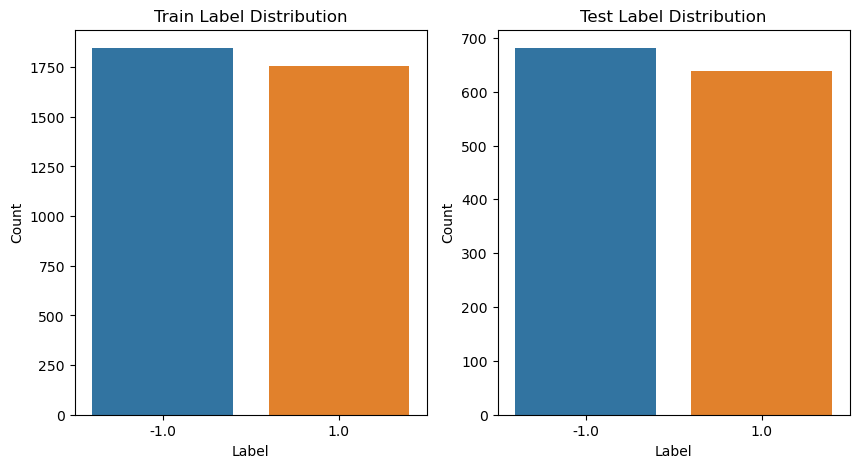

In [76]:
# 정상/비정상 데이터 확인
plt.figure(figsize=(10, 5))

# train
train_label_counts = y_train_temp.value_counts()
plt.subplot(1, 2, 1)
sns.barplot(x=train_label_counts.index, y=train_label_counts.values)
plt.title('Train Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# test
test_label_counts = y_test.value_counts()
plt.subplot(1, 2, 2)
sns.barplot(x=test_label_counts.index, y=test_label_counts.values)
plt.title('Test Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## 웹 페이지로부터 직접 데이터 불러오기

In [62]:
def read_file(file_path_url):
    # .tsv 확장자를 Load하기 위한 함수
    return np.loadtxt(file_path_url, delimiter="\t")

root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"
train = read_file(root_url + 'FordA_TRAIN.tsv')
test = read_file(root_url + 'FordA_TEST.tsv')

train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [63]:
## 데이터 형태 확인
print('train_set shape:', train.shape)
print('test_set shape:', test.shape)
train.head()

train_set shape: (3601, 501)
test_set shape: (1320, 501)


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1.0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1.0,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1.0,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1.0,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1.0,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [64]:
## 입력 변수(x), 타겟 변수(y) 분리하기
X_train_temp = train.iloc[:, 1:]
y_train_temp = train.iloc[:, :1]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, :1]

## 학습용, 검증용, 테스트용 데이터셋 나누기

In [77]:
# 정상과 비정상의 데이터의 비율을 동일하게 맞춰주기
normal_X = X_train_temp[y_train_temp == 1]     # Train_X 데이터 중 정상 데이터
abnormal_X = X_train_temp[y_train_temp == -1]  # Train_X 데이터 중 비정상 데이터
normal_y = y_train_temp[y_train_temp == 1]     # Train_y 데이터 중 정상 데이터
abnormal_y = y_train_temp[y_train_temp == -1]  # Train_y 데이터 중 비정상 데이터

# 데이터를 8:2로 나누기 위한 인덱스 설정
ind_X_nomal = int(normal_X.shape[0]*0.8)
ind_y_nomal = int(normal_y.shape[0]*0.8)
ind_X_abnormal = int(abnormal_X.shape[0]*0.8)
ind_y_abnormal = int(abnormal_y.shape[0]*0.8)

# 데이터셋 나누기
X_train = np.concatenate((normal_X[:ind_X_nomal], abnormal_X[:ind_X_abnormal]), axis=0)
X_valid = np.concatenate((normal_X[ind_X_nomal:], abnormal_X[ind_X_abnormal:]), axis=0)
y_train = np.concatenate((normal_y[:ind_y_nomal], abnormal_y[:ind_y_abnormal]), axis=0)
y_valid = np.concatenate((normal_y[ind_y_nomal:], abnormal_y[ind_y_abnormal:]), axis=0)

In [78]:
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('X_train shape:', X_test.shape)
print('y_train shape:', y_test.shape)

X_train shape: (2880, 500)
X_valid shape: (721, 500)
y_train shape: (2880,)
y_valid shape: (721,)
X_train shape: (1320, 500)
y_train shape: (1320,)
